In [174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler

In [175]:
data = pd.read_csv("./local_data/data_cleaned.csv")

In [176]:
numerical_data = data.filter(data.select_dtypes(["float64", "int64"]).columns)
numerical_data = numerical_data.fillna(numerical_data.median()).dropna(axis=1)
drop_cols = [
    "id",
    "host_id",
    "name",
    "neighbourhood_group",
    "neighbourhood",
    "last_review",
    "scrape_id",
    "price_per_person",
]
numerical_data = numerical_data.drop(columns=drop_cols, errors="ignore")
# numerical_data = numerical_data[
#     numerical_data["price"] < numerical_data["price"].quantile(0.99)
# ]

### transform features


In [177]:
numerical_data["number_of_reviews"]

0        0
1       52
2       21
3       33
4        0
        ..
2505    75
2506     0
2507    12
2508    43
2509     3
Name: number_of_reviews, Length: 2510, dtype: int64

In [178]:
correlation_matrix = numerical_data.filter(
    numerical_data.select_dtypes(["int64", "float64"]).columns
).corr()

In [179]:
col = "accommodates"
val = 0.95

numerical_data[numerical_data[col] >= numerical_data[col].quantile(val)].filter(
    ["price", col]
).corr()["price"]

price           1.000000
accommodates    0.100584
Name: price, dtype: float64

In [180]:
col = "bathrooms"
val = 0.99

numerical_data[numerical_data[col] >= numerical_data[col].quantile(val)].filter(
    ["price", col]
).corr()["price"]

price        1.000000
bathrooms    0.254857
Name: price, dtype: float64

In [181]:
col = "beds"
val = 0.9

numerical_data[numerical_data[col] >= numerical_data[col].quantile(val)].filter(
    ["price", col]
).corr()["price"]

price    1.000000
beds     0.046302
Name: price, dtype: float64

In [182]:
col = "bedrooms"
val = 0.95

numerical_data[numerical_data[col] >= numerical_data[col].quantile(val)].filter(
    ["price", col]
).corr()["price"]

price       1.000000
bedrooms    0.191663
Name: price, dtype: float64

In [183]:
col = "noise_night"
val = 0.95

numerical_data[numerical_data[col] >= numerical_data[col].quantile(val)].filter(
    ["price", col]
).corr()["price"]

price          1.000000
noise_night    0.110433
Name: price, dtype: float64

In [184]:
numerical_data.filter(numerical_data.select_dtypes(["int64", "float64"]).columns)

,price,tourism_restaurant,host_experience_days,distance_to_center_km,tourism_total,noise_night,tourism_points_within_radius,accommodates,host_total_listings_count,noise_day,...,neighbourhood_cleansed__Oberstrass,neighbourhood_cleansed__Höngg,neighbourhood_cleansed__Weinegg,neighbourhood_cleansed__Affoltern,neighbourhood_cleansed__Werd,neighbourhood_cleansed__Friesenberg,neighbourhood_group_cleansed__Kreis 12,neighbourhood_cleansed__Hirslanden,neighbourhood_cleansed__Albisrieden,neighbourhood_cleansed__Witikon
0,52.0,0.531341,877,5.111217,1.551361,-3.209803e+07,23,2,9,-2.389060e+07,...,0,0,0,1,0,0,0,0,0,0
1,110.0,5.638492,2802,3.615207,17.816253,-3.050661e+07,205,2,43,-2.248774e+07,...,0,0,0,0,0,0,0,0,0,0
2,165.0,10.976667,3749,2.120696,43.780436,-2.637602e+07,205,2,1,-1.852532e+07,...,0,0,0,0,0,0,0,0,0,0
3,131.0,5.705012,2802,3.600841,18.024935,-3.048881e+07,205,2,43,-2.247074e+07,...,0,0,0,0,0,0,0,0,0,0
4,804.0,3.559487,2225,4.548717,8.116114,-3.292512e+07,76,16,9,-2.487195e+07,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,110.0,45.277838,3905,0.359180,124.172786,-2.516267e+07,205,2,38,-1.714848e+07,...,0,0,0,0,0,0,0,0,0,0
2506,118.0,0.532019,2110,4.184141,1.503823,-3.622307e+07,15,8,7,-2.771325e+07,...,0,0,0,0,0,0,0,0,0,1
2507,147.0,40.955508,1811,0.265856,118.102149,-2.606673e+07,205,2,8,-1.786010e+07,...,0,0,0,0,0,0,0,0,0,0
2508,136.0,18.668976,2481,1.414742,66.231270,-2.476193e+07,205,2,2,-1.711193e+07,...,0,0,0,0,1,0,0,0,0,0


In [185]:
np.set_printoptions(precision=4, suppress=True)
pd.set_option("display.max_rows", None)
print(correlation_matrix["price"].sort_values(ascending=False, key=abs))

price                                           1.000000
accommodates                                    0.381031
bedrooms                                        0.364997
bathrooms                                       0.289664
beds                                            0.250713
tourism_restaurant                              0.232373
tourism_total                                   0.213640
tourism_touristattraction                       0.198730
tourism_hotel                                   0.197541
neighbourhood_group_cleansed__Kreis 1           0.193275
bathrooms_shared                               -0.179083
distance_to_center_km                          -0.168745
tourism_sportsactivitylocation                  0.166359
tourism_barorpub                                0.156164
room_type__Private room                        -0.154402
room_type__Entire home/apt                      0.153897
tourism_points_within_radius                    0.138704
noise_day                      

In [186]:
df_features = numerical_data.filter(
    numerical_data.select_dtypes(["int64", "float64"]).columns
)
# Berechnung von Skewness und Kurtosis für jedes Feature
from scipy.stats import skew, kurtosis

results = pd.DataFrame(
    {
        "Feature": df_features.columns,
        "Skewness": [
            (
                skew(df_features[col].dropna())
                if df_features[col].dtype in ["float64", "int64"]
                else None
            )
            for col in df_features.columns
        ],
        "Kurtosis": [
            (
                kurtosis(df_features[col].dropna())
                if df_features[col].dtype in ["float64", "int64"]
                else None
            )
            for col in df_features.columns
        ],
    }
)

# Ergebnisse anzeigen
print(results)

# Optional: Ergebnisse in eine CSV-Datei speichern
results.to_csv("local_data/skewness_kurtosis_results.csv", index=False)

                                          Feature  Skewness    Kurtosis
0                                           price  8.315836  109.599098
1                              tourism_restaurant  1.311682    1.196283
2                            host_experience_days -0.526930   -0.819293
3                           distance_to_center_km  0.461344   -0.555600
4                                   tourism_total  0.948831    0.207856
5                                     noise_night -0.857161    0.467744
6                    tourism_points_within_radius -1.088156   -0.570216
7                                    accommodates  2.156622    9.124530
8                       host_total_listings_count  2.390248    5.420054
9                                       noise_day -0.928902    0.556415
10                                  tourism_hotel  1.423501    1.493003
11                                      bathrooms  3.623114   26.798649
12                 tourism_sportsactivitylocation  1.158731    1

In [187]:
# Find skewed numerical features
high_skew = results[abs(results["Skewness"]) > 0.5]
pd.set_option("display.max_rows", None)
pd.reset_option("display.max_rows")
list_high_skew = np.array(high_skew["Feature"]).tolist()
print(list_high_skew)

['price', 'tourism_restaurant', 'host_experience_days', 'tourism_total', 'noise_night', 'tourism_points_within_radius', 'accommodates', 'host_total_listings_count', 'noise_day', 'tourism_hotel', 'bathrooms', 'tourism_sportsactivitylocation', 'host_has_profile_pic', 'tourism_touristattraction', 'host_identity_verified', 'beds', 'tourism_barorpub', 'host_acceptance_rate', 'host_response_rate', 'number_of_reviews', 'review_scores_cleanliness', 'days_since_last_review', 'listing_age_days', 'review_scores_rating', 'reviews_per_month', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'has_kitchen', 'noise_points_within_radius', 'room_type__Entire home/apt', 'bedrooms', 'has_wifi', 'has_essentials', 'number_of_reviews_ltm', 'has_hot_water', 'has_hair_dryer', 'has_dishes_and_silverware', 'has_refrigerator', 'number_of_reviews_l30d', 'calculated_host_listings_count_private_rooms', 'instant_bookable', 'room_type__P

In [188]:
df_features.skew().abs().sort_values(ascending=False).tail(20)

tourism_barorpub                      0.651065
host_experience_days                  0.527246
has_dishes_and_silverware             0.522422
has_refrigerator                      0.511880
has_washer                            0.494399
has_cooking_basics                    0.482225
distance_to_center_km                 0.461620
has_hangers                           0.451149
has_hot_water_kettle                  0.420380
has_dishwasher                        0.398336
has_oven                              0.391581
has_bed_linens                        0.366364
has_iron                              0.336324
has_long_term_stays_allowed           0.323044
amenity_count                         0.171656
has_self_check-in                     0.166409
host_response_time__within an hour    0.153529
has_dedicated_workspace               0.100585
has_shampoo                           0.082989
has_heating                           0.062219
dtype: float64

In [189]:
list_no_high_skew = [
    ele for ele in df_features.columns.tolist() if ele not in list_high_skew
]

In [190]:
# transformation
numerical_data_transformed = numerical_data.copy()
from sklearn.preprocessing import PowerTransformer, StandardScaler

power_scaler = PowerTransformer(method="yeo-johnson")
standard_scaler = StandardScaler()

list_no_high_skew = [
    ele for ele in df_features.columns.tolist() if ele not in list_high_skew
]
numerical_data_transformed.loc[:, list_high_skew] = power_scaler.fit_transform(
    numerical_data_transformed.loc[:, list_high_skew]
)
numerical_data_transformed.loc[:, list_no_high_skew] = standard_scaler.fit_transform(
    numerical_data_transformed.loc[:, list_no_high_skew]
)


print("DataFrame after Yeo-Johnson transformation")
numerical_data_transformed.to_csv(
    "local_data/numerical_data_transformed.csv", index=False
)
numerical_data_transformed

/var/folders/yj/d6dnn2c12fx2z9d89ztngqn00000gn/T/ipykernel_6549/2869111665.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.604  -0.2057  0.5964 ... -0.9737 -0.4635 -0.1674]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  numerical_data_transformed.loc[:, list_high_skew] = power_scaler.fit_transform(
/var/folders/yj/d6dnn2c12fx2z9d89ztngqn00000gn/T/ipykernel_6549/2869111665.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.7854  0.6647  0.6647 ...  0.6647  0.6647  0.6647]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  numerical_data_transformed.loc[:, list_high_skew] = power_scaler.fit_transform(
/var/folders/yj/d6dnn2c12fx2z9d89ztngqn00000gn/T/ipykernel_6549/2869111665.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and

DataFrame after Yeo-Johnson transformation


,price,tourism_restaurant,host_experience_days,distance_to_center_km,tourism_total,noise_night,tourism_points_within_radius,accommodates,host_total_listings_count,noise_day,...,neighbourhood_cleansed__Oberstrass,neighbourhood_cleansed__Höngg,neighbourhood_cleansed__Weinegg,neighbourhood_cleansed__Affoltern,neighbourhood_cleansed__Werd,neighbourhood_cleansed__Friesenberg,neighbourhood_group_cleansed__Kreis 12,neighbourhood_cleansed__Hirslanden,neighbourhood_cleansed__Albisrieden,neighbourhood_cleansed__Witikon
0,-1.994838,-1.828545,-1.603965,1.923320,-1.848914,-2.220446e-15,-1.785419,-0.410186,0.330966,-6.661338e-15,...,-0.166871,-0.166871,-0.159144,6.336209,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
1,-0.388184,-0.521918,-0.205748,0.832109,-0.531312,-1.443290e-15,0.664712,-0.410186,1.106243,-4.773959e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
2,0.340299,0.106693,0.596437,-0.258010,0.344456,1.110223e-15,0.664712,-0.410186,-1.153531,3.219647e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
3,-0.063103,-0.511831,-0.205748,0.821630,-0.521570,-1.443290e-15,0.664712,-0.410186,1.106243,-4.662937e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
4,2.447205,-0.889389,-0.663123,1.513024,-1.104348,-2.553513e-15,-1.415807,2.995823,0.330966,-7.882583e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,-0.388184,1.818575,0.733947,-1.542885,1.734171,2.109424e-15,0.664712,-0.410186,1.057609,7.216450e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
2506,-0.255464,-1.828199,-0.750981,1.247097,-1.857879,-3.663736e-15,-1.811885,2.122682,0.173427,-1.065814e-14,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,6.943752
2507,0.141947,1.680219,-0.973682,-1.610957,1.656413,1.332268e-15,0.664712,-0.410186,0.258181,4.996004e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
2508,0.004350,0.688159,-0.463474,-0.772942,0.842202,2.442491e-15,0.664712,-0.410186,-0.693766,7.327472e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,6.619776,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014


In [191]:
# def transform_features(df: pd.DataFrame) -> pd.DataFrame:
#     transformed_df = df.copy()

#     numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
#     if "price" in numeric_cols:
#         numeric_cols.remove("price")

#     sqrt_df = df[numeric_cols].apply(lambda x: np.sqrt(x - x.min() + 1))
#     sqrt_df.columns = [f"sqrt_{col}" for col in numeric_cols]

#     log_df = df[numeric_cols].apply(lambda x: np.log(x - x.min() + 1))
#     log_df.columns = [f"log_{col}" for col in numeric_cols]

#     # winsorisation
#     wins_df = df[numeric_cols].apply(
#         lambda x: stats.mstats.winsorize(x, limits=[0.023, 0.023])
#     )
#     wins_df.columns = [f"wins_{col}" for col in numeric_cols]

#     return pd.concat([transformed_df, sqrt_df, log_df, wins_df], axis=1)


# numerical_data_transformed = transform_features(numerical_data)

In [192]:
X = numerical_data_transformed.drop("price", axis=1)
y = numerical_data["price"]

In [193]:
numerical_data_transformed.sort_values("price", ascending=False).head(20)

,price,tourism_restaurant,host_experience_days,distance_to_center_km,tourism_total,noise_night,tourism_points_within_radius,accommodates,host_total_listings_count,noise_day,...,neighbourhood_cleansed__Oberstrass,neighbourhood_cleansed__Höngg,neighbourhood_cleansed__Weinegg,neighbourhood_cleansed__Affoltern,neighbourhood_cleansed__Werd,neighbourhood_cleansed__Friesenberg,neighbourhood_group_cleansed__Kreis 12,neighbourhood_cleansed__Hirslanden,neighbourhood_cleansed__Albisrieden,neighbourhood_cleansed__Witikon
2384,3.661612,1.963918,-0.968568,-1.463338,1.839174,1.776357e-15,0.664712,1.677661,-0.203545,6.439294e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
1224,3.595752,2.045064,-1.418731,-1.317262,1.867194,1.665335e-15,0.664712,0.969656,-0.049582,5.884182e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
2383,3.517316,1.963918,-0.968568,-1.463338,1.839174,1.776357e-15,0.664712,1.677661,-0.203545,6.439294e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
2387,3.411046,1.963918,-0.968568,-1.463338,1.839174,1.776357e-15,0.664712,1.677661,-0.203545,6.439294e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
1923,3.368205,-0.714707,-0.150980,0.965530,-0.701085,-1.443290e-15,0.664712,2.433946,-0.203545,-4.773959e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
505,3.081982,1.803326,-1.835047,-1.050402,1.611737,1.221245e-15,0.664712,1.677661,0.173427,4.551914e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
320,3.028151,1.186021,-1.197741,-0.463250,0.954101,1.110223e-16,0.664712,0.969656,-1.153531,5.551115e-16,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
308,2.910196,-0.078770,-0.018066,-0.079816,-0.035532,7.771561e-16,0.664712,2.122682,0.944130,1.554312e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
388,2.848961,1.288419,-0.980979,-0.546944,1.073621,2.220446e-16,0.664712,1.922239,0.394438,9.992007e-16,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014
1500,2.837073,-0.813137,1.488943,1.366725,-0.985475,-2.331468e-15,-1.098711,1.677661,0.258181,-7.327472e-15,...,-0.166871,-0.166871,-0.159144,-0.157823,-0.151063,-0.14828,-0.146871,-0.146871,-0.145449,-0.144014


In [194]:
y.describe()

count    2510.000000
mean      176.759761
std       185.586163
min        21.000000
25%        98.000000
50%       138.000000
75%       194.000000
max      3540.000000
Name: price, dtype: float64

In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=99
)


# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train
X_test_scaled = X_test

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [196]:
cv = KFold(n_splits=5, shuffle=True, random_state=99)

In [197]:
lasso_cv = LassoCV(
    cv=cv,
    random_state=99,
    max_iter=100000,
    alphas=np.logspace(-4, 3, 200),
    selection="random",
    tol=1e-3,
    fit_intercept=True,
)

lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([   0.0001,    0.0001,    0.0001,    0.0001,    0.0001,    0.0001,
          0.0002,    0.0002,    0.0002,    0.0002,    0.0002,    0.0002,
          0.0003,    0.0003,    0.0003,    0.0003,    0.0004,    0.0004,
          0.0004,    0.0005,    0.0005,    0.0005,    0.0006,    0.0006,
          0.0007,    0.0008,    0.0008,    0.0009,    0.001 ,    0.001 ,
          0.0011,    0.0012,    0.0013,    0.0014,    0.0016,    0.0017,
          0.0018,    0.002 ,    0.0022,    0.0024,    0.0026,    0.0028,
          0.003 ,    0.0033,    0.0035,    0.0038,    0.0042,    0.0...
         81.1984,   88.0488,   95.4772,  103.5322,  112.2668,  121.7383,
        132.0088,  143.1459,  155.2225,  168.318 ,  182.5183,  197.9167,
        214.6141,  232.7202,  252.3539,  273.644 ,  296.7302,  321.7642,
        348.9101,  378.3463,  410.2658,  444.8783,  482.4109,  523.1099,
        567.2426,  615.0986,  666.992 ,  723.2634,  784.2822,  850.4489,
        922.1979, 1000.    ]),
        cv=KFold(n_splits=5, random_state=99, shuffle=True), max_iter=100000,
        random_state=99, selection='random', tol=0.001)

Best regularization parameter: 0.28


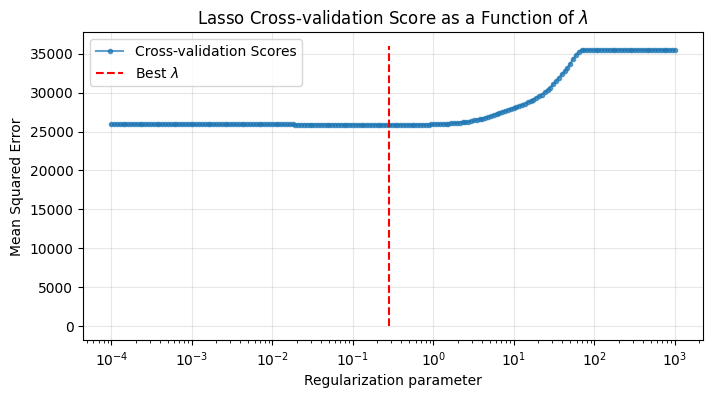

In [198]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    lasso_cv.alphas_,
    lasso_cv.mse_path_.mean(axis=1),
    marker="o",
    markersize=3,
    alpha=0.7,
    label="Cross-validation Scores",
)
# Plot the final chosen regularization parameter
ax.vlines(
    lasso_cv.alpha_,
    0,
    ax.get_ylim()[1],
    linestyle="--",
    color="red",
    label=r"Best $\lambda$",
)

# Aesthetics
ax.set_xscale("log")
ax.set_xlabel("Regularization parameter")
ax.set_ylabel("Mean Squared Error")
ax.set_title(r"Lasso Cross-validation Score as a Function of $\lambda$")
ax.grid(alpha=0.3)
ax.legend()

print(f"Best regularization parameter: {lasso_cv.alpha_:.2f}")

In [199]:
def evaluate_model(y_true: np.ndarray, y_pred: np.ndarray, dataset_name: str) -> None:
    """"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")


y_train_pred = lasso_cv.predict(X_train_scaled)
y_test_pred = lasso_cv.predict(X_test_scaled)


evaluate_model(y_train, y_train_pred, "train")
evaluate_model(y_test, y_test_pred, "test")


train Metrics:
R² Score: 0.3645
RMSE: 149.98
MAE: 78.87

test Metrics:
R² Score: 0.1454
RMSE: 161.09
MAE: 76.10


\coeffs:
                                       feat      coeff
69    neighbourhood_group_cleansed__Kreis 1  55.340230
11           tourism_sportsactivitylocation  54.225031
0                        tourism_restaurant  44.092191
78          neighbourhood_cleansed__Rathaus -37.765228
34                                 bedrooms  33.102389
18                            amenity_count  32.023182
6                              accommodates  31.940644
20                        number_of_reviews -28.508205
70    neighbourhood_group_cleansed__Kreis 2 -27.343228
10                                bathrooms  27.151620
38                            has_hot_water -23.209577
17                     host_acceptance_rate  22.111487
2                     distance_to_center_km  20.858959
46       host_response_time__within an hour -19.295156
5              tourism_points_within_radius -19.008598
73      neighbourhood_cleansed__Langstrasse -17.917463
41                         has_refrigerator -17.337545
2

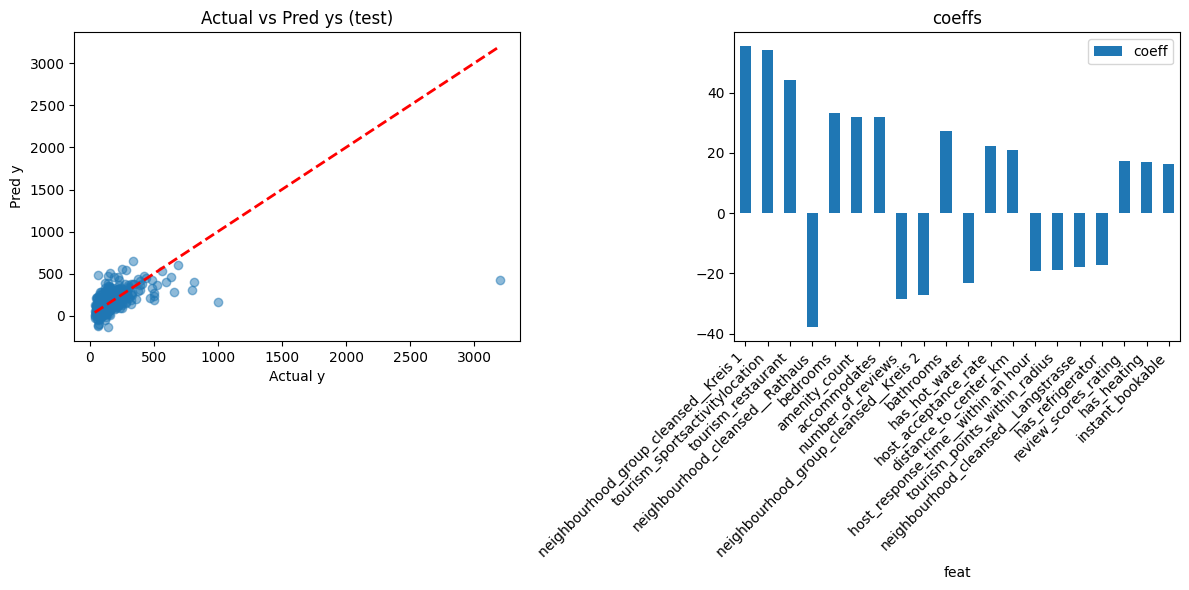

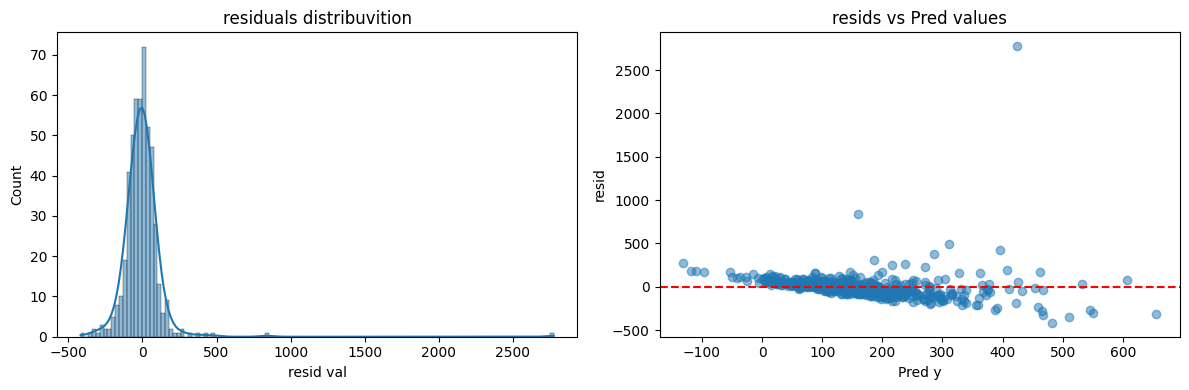

In [200]:
feature_importance = pd.DataFrame({"feat": X.columns, "coeff": lasso_cv.coef_})

feature_importance["Abs_coeff"] = abs(feature_importance["coeff"])
feature_importance_sorted = feature_importance.sort_values("Abs_coeff", ascending=False)
non_zero_features = feature_importance_sorted[feature_importance_sorted["coeff"] != 0]

print(r"\coeffs:")
print(non_zero_features[["feat", "coeff"]].to_string())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual y")
plt.ylabel("Pred y")
plt.title("Actual vs Pred ys (test)")

# Plot 2: feat coeffs
plt.subplot(1, 2, 2)
non_zero_features.head(20).plot(kind="bar", x="feat", y="coeff", ax=plt.gca())
plt.xticks(rotation=45, ha="right")
plt.title("coeffs")
plt.tight_layout()
plt.show()

residuals = y_test - y_test_pred

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("residuals distribuvition")
plt.xlabel("resid val")

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Pred y")
plt.ylabel("resid")
plt.title("resids vs Pred values")
plt.tight_layout()
plt.show()

In [201]:
coefficient_df = pd.DataFrame(
    {
        "feature": X.columns,
        "coeff": lasso_cv.coef_,
        "coeff_abs": abs(lasso_cv.coef_),
    }
)

coefficient_df = coefficient_df.sort_values("coeff_abs", ascending=False)
coefficient_df

,feature,coeff,coeff_abs
69,neighbourhood_group_cleansed__Kreis 1,55.340230,55.340230
11,tourism_sportsactivitylocation,54.225031,54.225031
0,tourism_restaurant,44.092191,44.092191
78,neighbourhood_cleansed__Rathaus,-37.765228,37.765228
34,bedrooms,33.102389,33.102389
...,...,...,...
16,tourism_barorpub,-0.000000,0.000000
57,calculated_host_listings_count_private_rooms,-0.000000,0.000000
26,review_scores_accuracy,0.000000,0.000000
28,review_scores_communication,0.000000,0.000000


## RF


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 155}
Best Score: -16562.71062159984
train Metrics:
R² Score: 0.8464
MSE: 5437.74
RMSE: 73.74
MAE: 30.09
test Metrics:
R² Score: 0.2473
MSE: 22853.76
RMSE: 151.17
MAE: 56.21


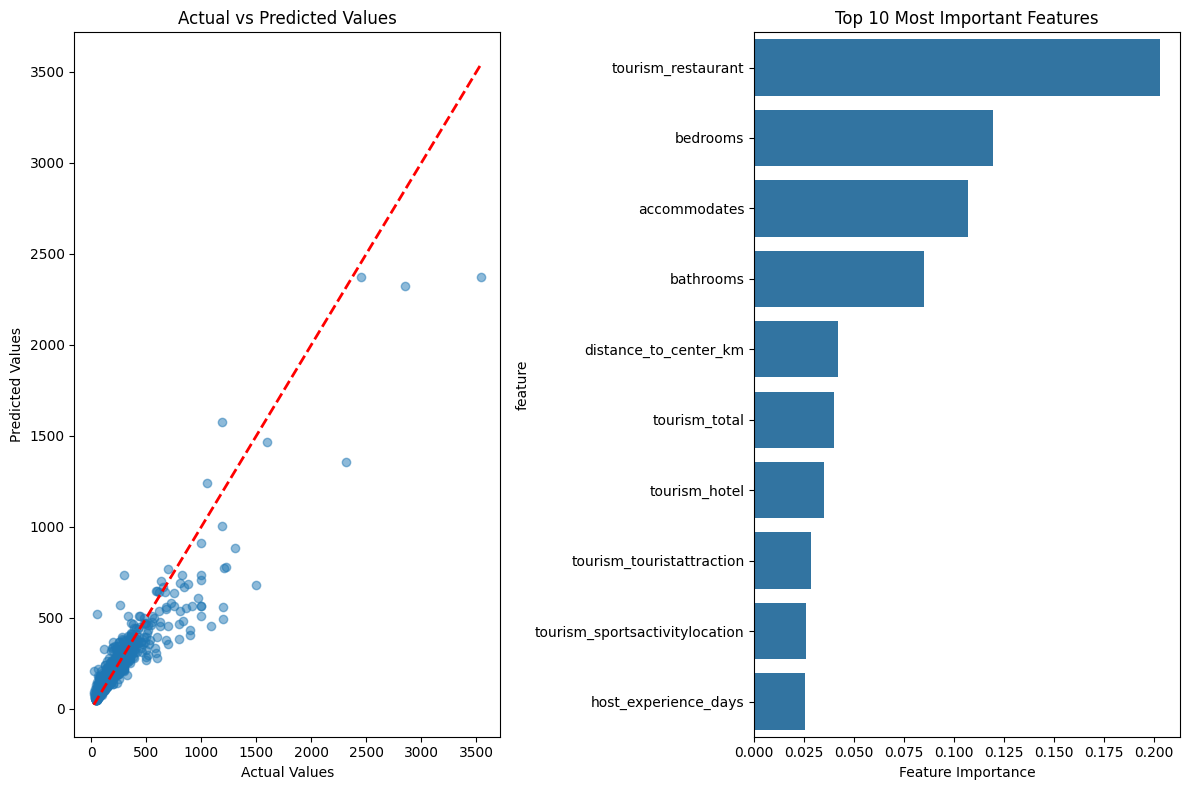

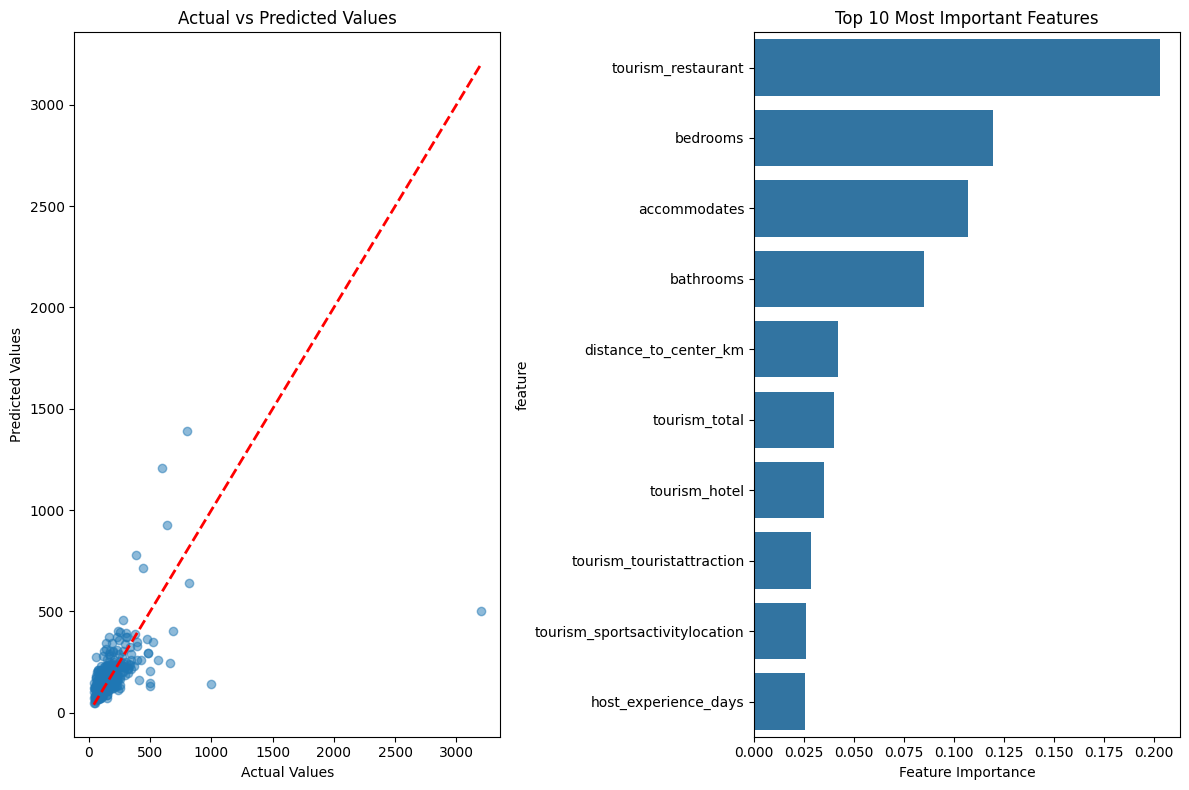

In [202]:
# find best parameters for random forest
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestRegressor()

param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=15,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=99,
)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Random Forest functions


def perform_rf(X_train_scaled, y_train):  # use best parameters in regressor
    rf = RandomForestRegressor(
        n_estimators=155,
        random_state=99,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=2,
    )

    rf.fit(X_train_scaled, y_train)

    return rf


def evaluate_rf(rf, y_true, y_pred, dataset_name: str):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{dataset_name} Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    feature_importance = pd.DataFrame(
        {"feature": X.columns, "importance": rf.feature_importances_}
    ).sort_values(by="importance", ascending=False)

    return {
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "feature_importance": feature_importance,
    }


def visualize_rf_performance(y_true, y_pred, feature_importance):
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))

    # Scatter, actual vs predicted
    axes[0].scatter(y_true, y_pred, alpha=0.5)
    axes[0].plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--", lw=2
    )
    axes[0].set_title("Actual vs Predicted Values")
    axes[0].set_xlabel("Actual Values")
    axes[0].set_ylabel("Predicted Values")

    # feature_importance bar chart (top 10)

    top_features = feature_importance.head(10)
    sns.barplot(x="importance", y="feature", data=top_features, ax=axes[1])
    axes[1].set_title("Top 10 Most Important Features")
    axes[1].set_xlabel("Feature Importance")

    plt.tight_layout()
    plt.show()


# perform Random forest and evaluate

rf = perform_rf(X_train_scaled, y_train)  # fit random forest model

y_train_pred_rf = rf.predict(X_train_scaled)  # make predictions
y_test_pred_rf = rf.predict(X_test_scaled)

dict_rf1 = evaluate_rf(
    rf, y_train, y_train_pred_rf, "train"
)  # evaluate with MSE etc. and show most important features

dict_rf2 = evaluate_rf(rf, y_test, y_test_pred_rf, "test")

visualize_rf_performance(
    y_train, y_train_pred_rf, dict_rf1["feature_importance"]
)  # create scatter plot with actual vs predicted data, plot bar chart with most important features

visualize_rf_performance(y_test, y_test_pred_rf, dict_rf2["feature_importance"])